## Classification with MNIST/FMNIST datasets_tunning

In [26]:
import os
import numpy as np

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Data Load

#### MNIST

In [23]:
mnist_train = datasets.MNIST(
    root="mnist", 
    train=True, 
    download=True, 
    transform=transforms.ToTensor()
)
mnist_test = datasets.MNIST(
    root="mnist", 
    train=False, 
    download=True, 
    transform=transforms.ToTensor()
)

#### Fashion MNIST

In [9]:
fmnist_train = datasets.FashionMNIST(
    root="fmnist", 
    train=True, 
    download=True, 
    transform=transforms.ToTensor()
)
fmnist_test = datasets.FashionMNIST(
    root="fmnist", 
    train=False, 
    download=True, 
    transform=transforms.ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting fmnist\FashionMNIST\raw\train-images-idx3-ubyte.gz to fmnist\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting fmnist\FashionMNIST\raw\train-labels-idx1-ubyte.gz to fmnist\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting fmnist\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to fmnist\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting fmnist\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to fmnist\FashionMNIST\raw



In [4]:
fmnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: mnist
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
# Check the size of each data.
sample_x, sample_y = fmnist_train[0]
print(sample_x.shape)
print(sample_y)

torch.Size([1, 28, 28])
9


In [11]:
# Check the size of the entire data.
fmnist_train.targets.shape, fmnist_train.targets.unique()

(torch.Size([60000]), tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [7]:
# Check the images.
def plot_mnist(data, figsize=(20, 10)):
    fig = plt.figure(figsize=figsize)
    for i in range(18):
        img = data[i][0]
        ax = fig.add_subplot(3, 6, i+1)
        ax.imshow(img.reshape(28, 28), cmap="gray")
        ax.set_title(f"Label: {data[i][1]}")
    pass

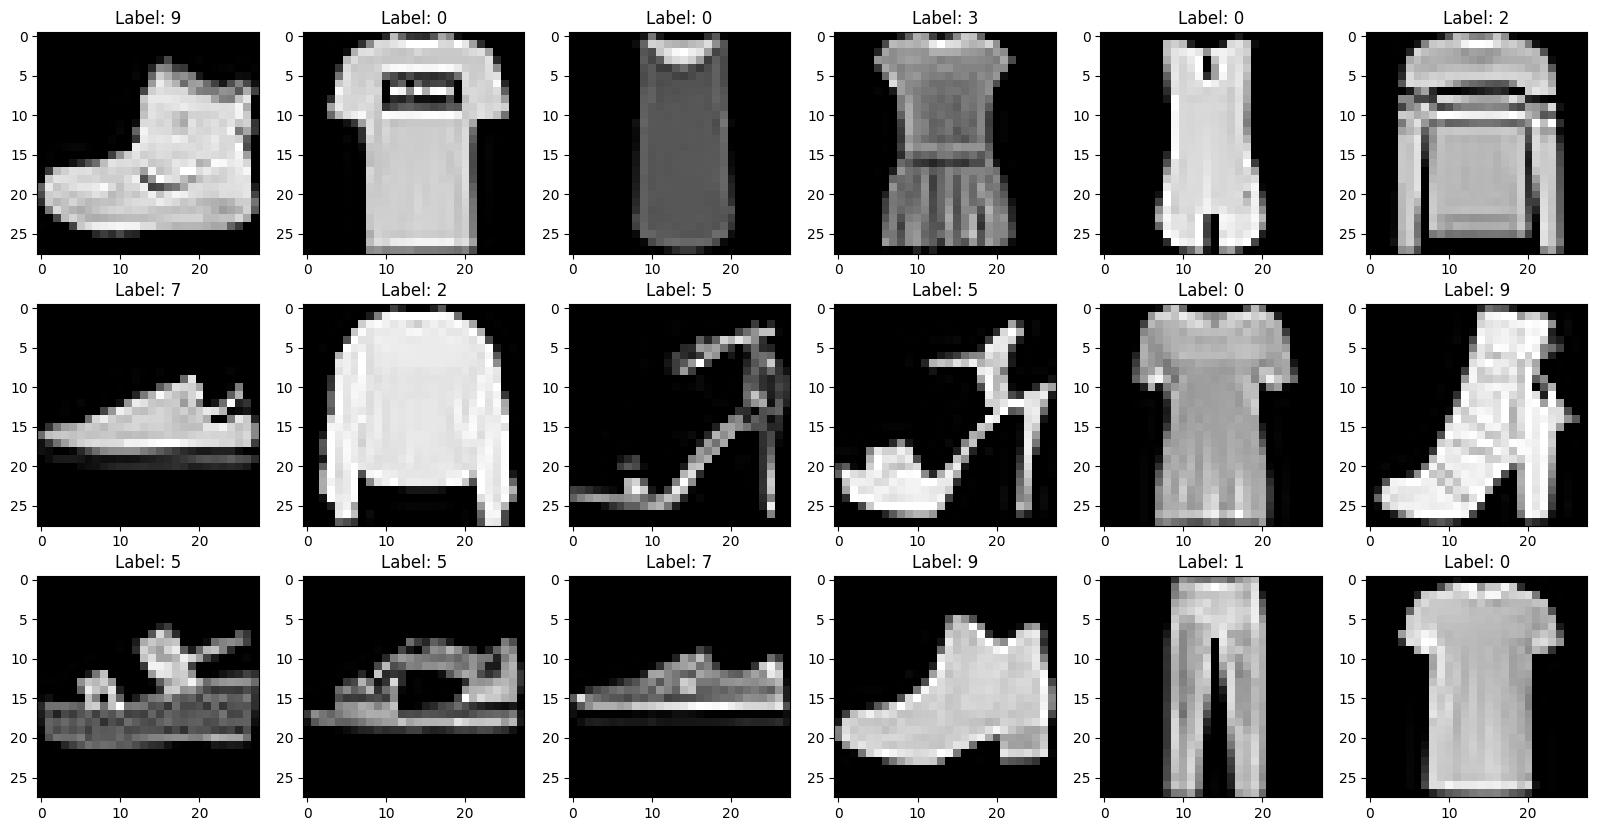

In [12]:
plot_mnist(data=fmnist_train)

#### KMNIST

In [13]:
kmnist_train = datasets.KMNIST(
    root="kmnist", 
    train=True, 
    download=True, 
    transform=transforms.ToTensor()
)
kmnist_test = datasets.KMNIST(
    root="kmnist", 
    train=False, 
    download=True, 
    transform=transforms.ToTensor()
)

  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting kmnist\KMNIST\raw\train-images-idx3-ubyte.gz to kmnist\KMNIST\raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting kmnist\KMNIST\raw\train-labels-idx1-ubyte.gz to kmnist\KMNIST\raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting kmnist\KMNIST\raw\t10k-images-idx3-ubyte.gz to kmnist\KMNIST\raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting kmnist\KMNIST\raw\t10k-labels-idx1-ubyte.gz to kmnist\KMNIST\raw



In [14]:
# Check the size of each data.
sample_x, sample_y = kmnist_train[0]
print(sample_x.shape)
print(sample_y)

torch.Size([1, 28, 28])
8


In [15]:
# Check the size of the entire data.
kmnist_train.targets.shape, kmnist_train.targets.unique()

(torch.Size([60000]), tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

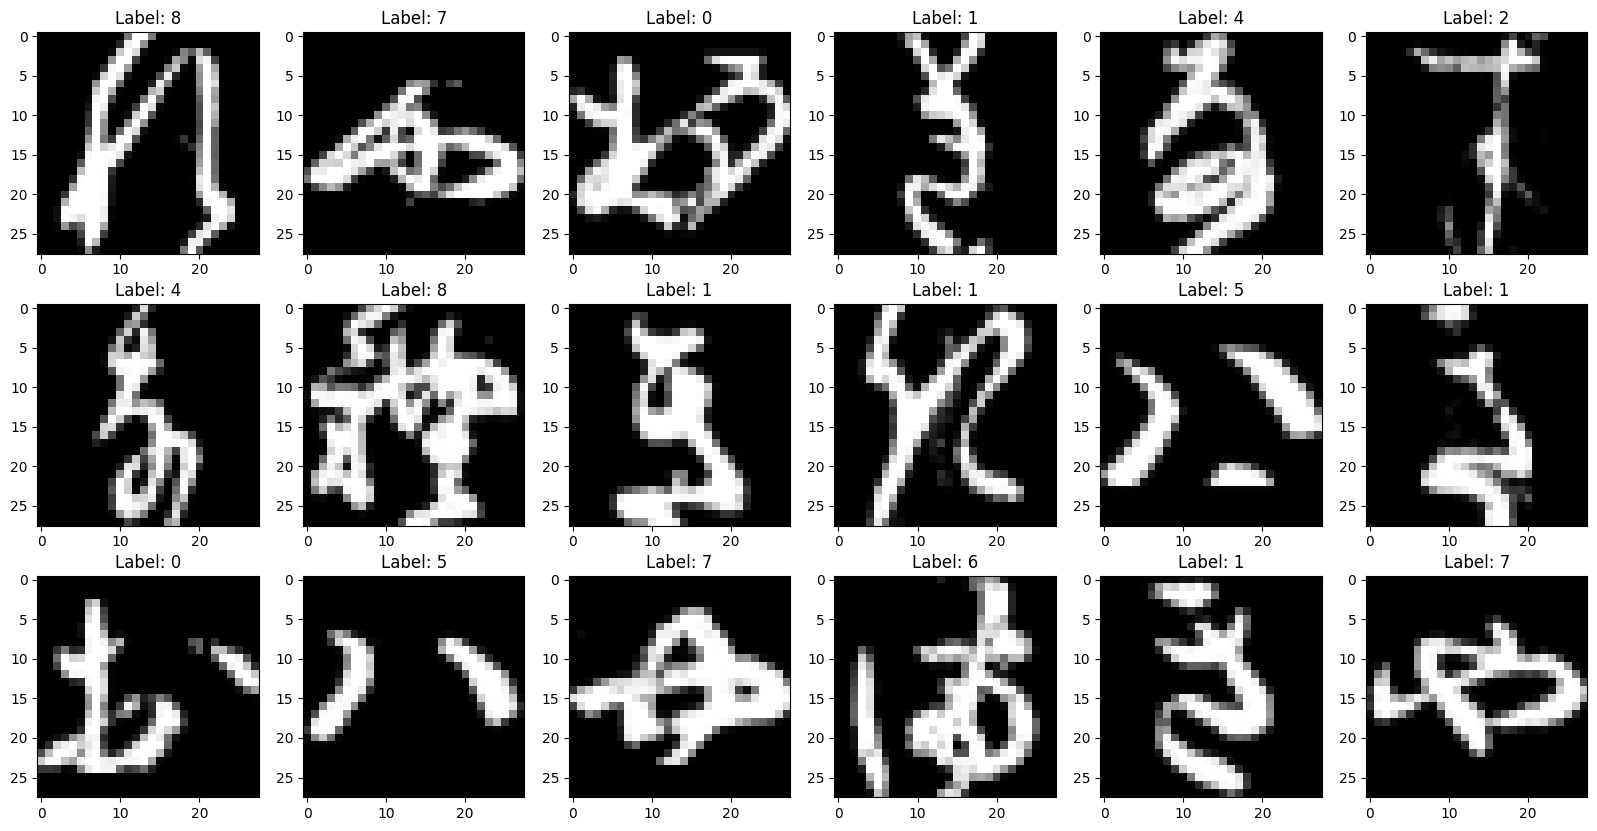

In [16]:
plot_mnist(data=kmnist_train)

#### EMNIST

In [18]:
emnist_train = datasets.EMNIST(
    root="emnist",
    split="byclass",
    train=True, 
    download=True, 
    transform=transforms.ToTensor()
)
emnist_test = datasets.EMNIST(
    root="emnist",
    split="byclass",
    train=False, 
    download=True, 
    transform=transforms.ToTensor()
)

  0%|          | 0/561753746 [00:00<?, ?it/s]

Extracting emnist\EMNIST\raw\gzip.zip to emnist\EMNIST\raw


In [19]:
# Check the size of each data.
sample_x, sample_y = emnist_train[0]
print(sample_x.shape)
print(sample_y)

torch.Size([1, 28, 28])
35


In [20]:
# Check the size of the entire data.
emnist_train.targets.shape, emnist_train.targets.unique()

(torch.Size([697932]),
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57, 58, 59, 60, 61]))

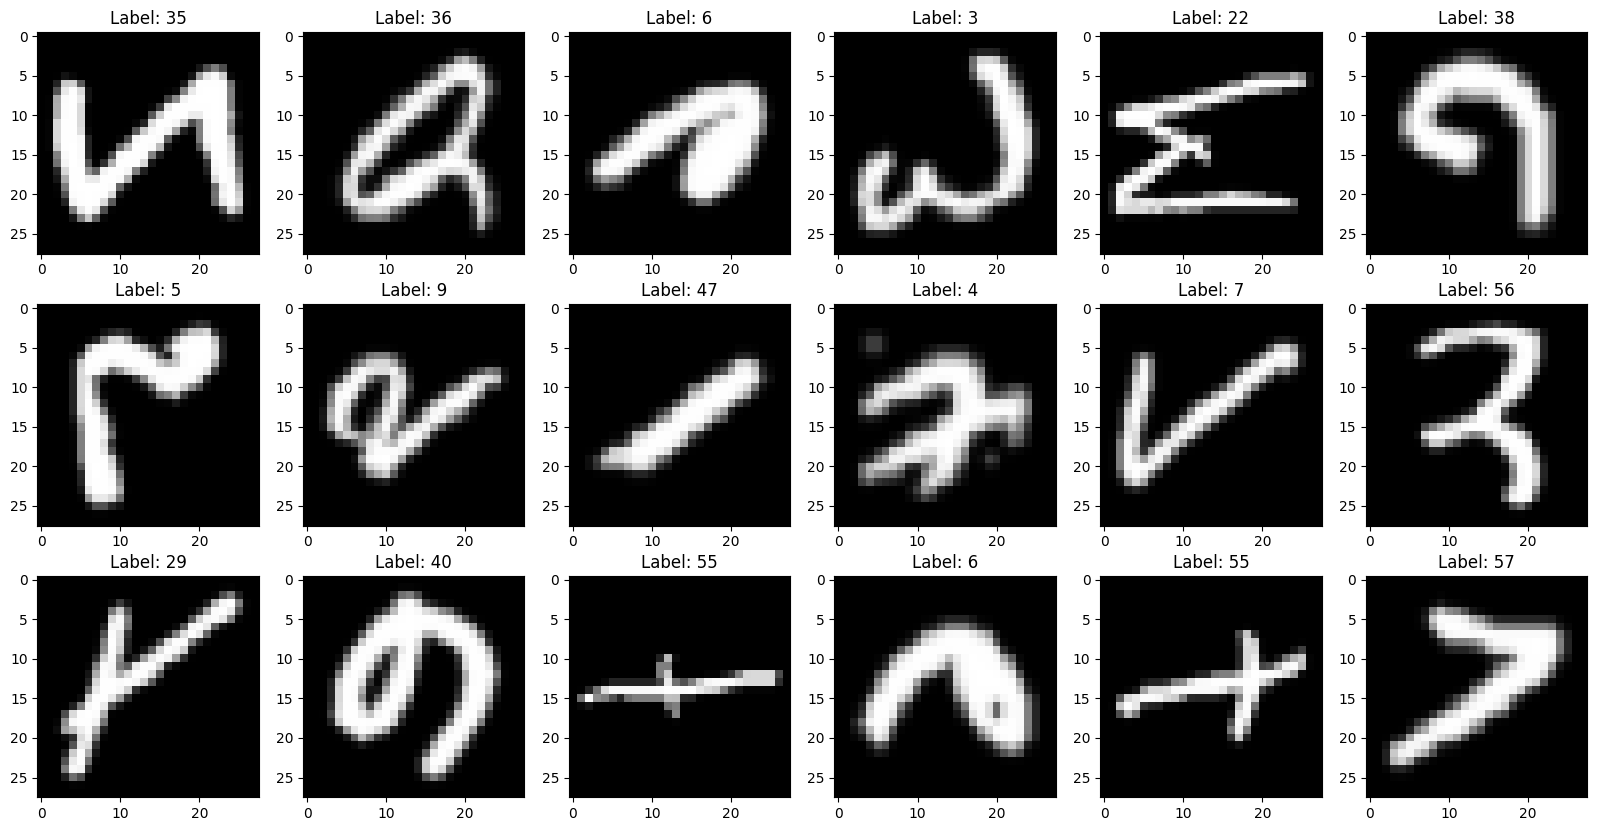

In [21]:
plot_mnist(data=emnist_train)

### Preprocess

In [27]:
class mnist_dataset(Dataset):
    def __init__(self, data, targets, transform=None, target_transform=None):
        super().__init__()

        self.data = data
        self.targets = targets
        self.transform = transform
        self.target_transform = target_transform
        pass

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x, y = self.data[idx], self.targets[idx]

        if self.transform:
              x = self.transform(x)
        if self.target_transform:
              y = self.target_transform(y)

        return x, y

In [28]:
def split_train_valid(dataset, valid_ratio=0.1):
    n_valid = int(len(dataset) * valid_ratio)

    train_data = dataset.data[:-n_valid].numpy()
    valid_data = dataset.data[-n_valid:].numpy()
    train_targets = dataset.targets[:-n_valid]
    valid_targets = dataset.targets[-n_valid:]

    train = mnist_dataset(data=train_data, targets=train_targets, transform=dataset.transform, target_transform=dataset.target_transform)
    valid = mnist_dataset(data=valid_data, targets=valid_targets, transform=dataset.transform, target_transform=dataset.target_transform)

    return train, valid

In [29]:
mnist_train, mnist_valid = split_train_valid(dataset=mnist_train)
fmnist_train, fmnist_valid = split_train_valid(dataset=fmnist_train)
kmnist_train, kmnist_valid = split_train_valid(dataset=kmnist_train)
emnist_train, emnist_valid = split_train_valid(dataset=emnist_train) #, valid_ratio=0.05)

In [30]:
mnists = {}
mnists["mnist"] = {"train": mnist_train, "valid": mnist_valid, "test": mnist_test}
mnists["fmnist"] = {"train": fmnist_train, "valid": fmnist_valid, "test": fmnist_test}
mnists["kmnist"] = {"train": kmnist_train, "valid": kmnist_valid, "test": kmnist_test}
mnists["emnist"] = {"train": emnist_train, "valid": emnist_valid, "test": emnist_test}

for k in mnists.keys():
    print(f"Length of {k}: train - {len(mnists[k]['train'])}, valid - {len(mnists[k]['valid'])}, test - {len(mnists[k]['test'])}.")

Length of mnist: train - 54000, valid - 6000, test - 10000.
Length of fmnist: train - 54000, valid - 6000, test - 10000.
Length of kmnist: train - 54000, valid - 6000, test - 10000.
Length of emnist: train - 628139, valid - 69793, test - 116323.


In [31]:
mnists

{'mnist': {'train': <__main__.mnist_dataset at 0x1a301ed4940>,
  'valid': <__main__.mnist_dataset at 0x1a301ed4070>,
  'test': Dataset MNIST
      Number of datapoints: 10000
      Root location: mnist
      Split: Test
      StandardTransform
  Transform: ToTensor()},
 'fmnist': {'train': <__main__.mnist_dataset at 0x1a301ed4c40>,
  'valid': <__main__.mnist_dataset at 0x1a301ed4cd0>,
  'test': Dataset FashionMNIST
      Number of datapoints: 10000
      Root location: fmnist
      Split: Test
      StandardTransform
  Transform: ToTensor()},
 'kmnist': {'train': <__main__.mnist_dataset at 0x1a301ed4fa0>,
  'valid': <__main__.mnist_dataset at 0x1a301ed4760>,
  'test': Dataset KMNIST
      Number of datapoints: 10000
      Root location: kmnist
      Split: Test
      StandardTransform
  Transform: ToTensor()},
 'emnist': {'train': <__main__.mnist_dataset at 0x1a301ed4d00>,
  'valid': <__main__.mnist_dataset at 0x1a301ed45b0>,
  'test': Dataset EMNIST
      Number of datapoints: 116323


In [32]:
loaders = {}
for k in mnists.keys():
    loaders[k] = {s: DataLoader(dataset=mnists[k][s], batch_size=512 if k == "emnist" else 64, shuffle= s == "train", drop_last=True) for s in ["train", "valid", "test"]}

In [33]:
loaders

{'mnist': {'train': <torch.utils.data.dataloader.DataLoader at 0x1a301ed4ac0>,
  'valid': <torch.utils.data.dataloader.DataLoader at 0x1a301ed4c70>,
  'test': <torch.utils.data.dataloader.DataLoader at 0x1a301ed4ca0>},
 'fmnist': {'train': <torch.utils.data.dataloader.DataLoader at 0x1a301ed4820>,
  'valid': <torch.utils.data.dataloader.DataLoader at 0x1a301ed4ee0>,
  'test': <torch.utils.data.dataloader.DataLoader at 0x1a301ed4af0>},
 'kmnist': {'train': <torch.utils.data.dataloader.DataLoader at 0x1a301ed4400>,
  'valid': <torch.utils.data.dataloader.DataLoader at 0x1a301edb640>,
  'test': <torch.utils.data.dataloader.DataLoader at 0x1a301edbd90>},
 'emnist': {'train': <torch.utils.data.dataloader.DataLoader at 0x1a301edbe80>,
  'valid': <torch.utils.data.dataloader.DataLoader at 0x1a301edb4c0>,
  'test': <torch.utils.data.dataloader.DataLoader at 0x1a301edbc40>}}

### Model Build

In [34]:
class Classifier(nn.Module):
    def __init__(self, n_class=10):
        super().__init__()

        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, n_class),
        )

    def forward(self, x):
        return self.model(x)

In [35]:
mlp_classfier = Classifier()
mlp_classfier

Classifier(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=10, bias=True)
  )
)

### Train the Model

In [37]:
class Trainer(nn.Module):
    def __init__(self, model_class, loaders, n_class=10, opt="sgd", lr=0.001, has_scheduler=False, device="cpu"):
        super().__init__()

        self.model = model_class(n_class=n_class)
        self.loss = nn.CrossEntropyLoss()

        self.train_loader = loaders["train"]
        self.valid_loader = loaders["valid"]
        self.test_loader = loaders["test"]

        self._get_optimizer(opt=opt.lower(), lr=lr)
        self.has_scheduler = has_scheduler
        if self.has_scheduler:
            self._get_scheduler()

        self.device = device
        pass

    def _get_optimizer(self, opt, lr=0.001):
        if opt == "sgd":
            self.optimizer = torch.optim.SGD(params=self.model.parameters(), lr=lr)
        elif opt == "adam":
            self.optimizer = torch.optim.Adam(params=self.model.parameters(), lr=lr)
        else:
            raise ValueError(f"optimizer {opt} is not supproted")

    def _get_scheduler(self):
        self.scheduler = torch.optim.lr_scheduler.StepLR(optimizer=self.optimizer, step_size=5, gamma=0.5, verbose=True)

    def train(self, max_epochs=10):
        print("===== Train Start =====")
        history = {"train_loss": [], "train_acc": [], "valid_loss": [], "valid_acc": []}
        for e in range(max_epochs):
            train_loss, train_acc = self._train_epoch()
            valid_loss, valid_acc = self._valid_epoch()

            history["train_loss"].append(train_loss)
            history["train_acc"].append(train_acc)
            history["valid_loss"].append(valid_loss)
            history["valid_acc"].append(valid_acc)

            if self.has_scheduler:
                self.scheduler.step()

            if e % 5 == 0:
                print(f"Epoch: {e}, train loss: {train_loss:>6f}, train acc: {train_acc:>3f}, valid loss: {valid_loss:>6f}, valid acc: {valid_acc:>3f}")

        self.plot_history(history)

    def _train_epoch(self):
        epoch_loss, epoch_acc = 0, 0
        self.model.train()
        for (x, y) in self.train_loader:
            x = x.to(self.device)
            y = y.to(self.device)

            y_hat = self.model(x)
            loss = self.loss(y_hat, y)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            epoch_loss += loss.to("cpu").item()
            epoch_acc += (y_hat.argmax(1) == y).type(torch.float).to("cpu").mean().item()

        epoch_loss /= len(self.train_loader)
        epoch_acc /= len(self.train_loader)

        return epoch_loss, epoch_acc

    def _valid_epoch(self):
        epoch_loss, epoch_acc = 0, 0
        self.model.eval()
        with torch.no_grad():
            for (x, y) in self.valid_loader:
                x = x.to(self.device)
                y = y.to(self.device)

                y_hat = self.model(x)
                loss = self.loss(y_hat, y)

                epoch_loss += loss.to("cpu").item()
                epoch_acc += (y_hat.argmax(1) == y).type(torch.float).to("cpu").mean().item()

        epoch_loss /= len(self.valid_loader)
        epoch_acc /= len(self.valid_loader)

        return epoch_loss, epoch_acc

    def plot_history(self, history):
        fig = plt.figure(figsize=(20, 10))

        ax = fig.add_subplot(1, 2, 1)
        ax.plot(history["train_loss"], color="red", label="train loss")
        ax.plot(history["valid_loss"], color="blue", label="valid loss")
        ax.set_title("Loss")
        ax.legend()

        ax = fig.add_subplot(1, 2, 2)
        ax.plot(history["train_acc"], color="red", label="train acc")
        ax.plot(history["valid_acc"], color="blue", label="valid acc")
        ax.set_title("Acc")
        ax.legend()

        # fig.show()

    def test(self):
        print("===== Test Start =====")
        epoch_loss, epoch_acc = 0, 0
        self.model.eval()
        with torch.no_grad():
            for (x, y) in self.test_loader:
                x = x.to(self.device)
                y = y.to(self.device)

                y_hat = self.model(x)
                loss = self.loss(y_hat, y)

                epoch_loss += loss.to("cpu").item()
                epoch_acc += (y_hat.argmax(1) == y).type(torch.float).to("cpu").mean().item()

        epoch_loss /= len(self.test_loader)
        epoch_acc /= len(self.test_loader)

        print(f"Test loss: {epoch_loss:>6f}, Test acc: {epoch_acc:>3f}")

In [ ]:
# Excute the trainer function with various hyperparameters.

===== Train Start =====
Epoch: 0, train loss: 2.295044, train acc: 0.161495, valid loss: 2.282378, valid acc: 0.202621
Epoch: 5, train loss: 1.930238, train acc: 0.655101, valid loss: 1.822329, valid acc: 0.698925
Epoch: 10, train loss: 0.919846, train acc: 0.798321, valid loss: 0.797378, valid acc: 0.840390
Epoch: 15, train loss: 0.585348, train acc: 0.846957, valid loss: 0.493639, valid acc: 0.880208
Epoch: 20, train loss: 0.467889, train acc: 0.873147, valid loss: 0.387755, valid acc: 0.901546
Epoch: 25, train loss: 0.410175, train acc: 0.885824, valid loss: 0.337847, valid acc: 0.910786
Epoch: 30, train loss: 0.376699, train acc: 0.893906, valid loss: 0.309148, valid acc: 0.917003
Epoch: 35, train loss: 0.353796, train acc: 0.899892, valid loss: 0.290550, valid acc: 0.919019
Epoch: 40, train loss: 0.336714, train acc: 0.904878, valid loss: 0.276494, valid acc: 0.921203
Epoch: 45, train loss: 0.322747, train acc: 0.908400, valid loss: 0.264777, valid acc: 0.925739
===== Test Start =

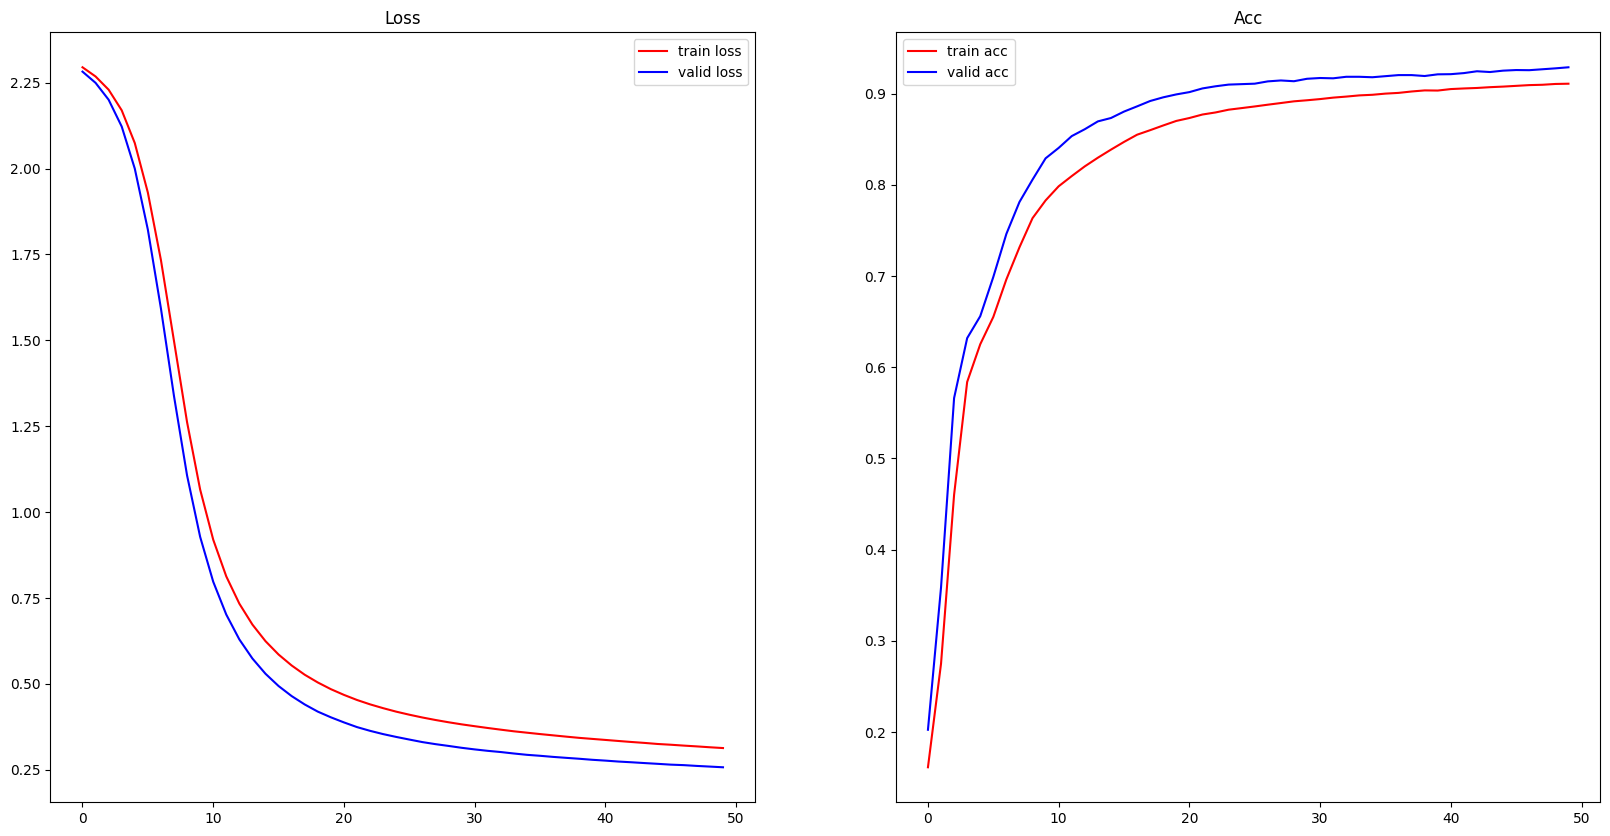

In [38]:
trainer = Trainer(model_class=Classifier, 
                  loaders=loaders["mnist"], 
                  n_class=10, 
                  opt="sgd", 
                  lr=0.001, 
                  device=device).to(device)
trainer.train(max_epochs=50)
trainer.test()

===== Train Start =====
Epoch: 0, train loss: 2.288445, train acc: 0.115195, valid loss: 2.273031, valid acc: 0.196573
Epoch: 5, train loss: 1.828913, train acc: 0.654804, valid loss: 1.688979, valid acc: 0.692876
Epoch: 10, train loss: 0.813427, train acc: 0.810647, valid loss: 0.704042, valid acc: 0.850470
Epoch: 15, train loss: 0.550435, train acc: 0.855631, valid loss: 0.464673, valid acc: 0.887769
Epoch: 20, train loss: 0.455351, train acc: 0.874907, valid loss: 0.379002, valid acc: 0.905914
Epoch: 25, train loss: 0.406447, train acc: 0.886010, valid loss: 0.335646, valid acc: 0.912130
===== Test Start =====
Test loss: 0.356428, Test acc: 0.899339


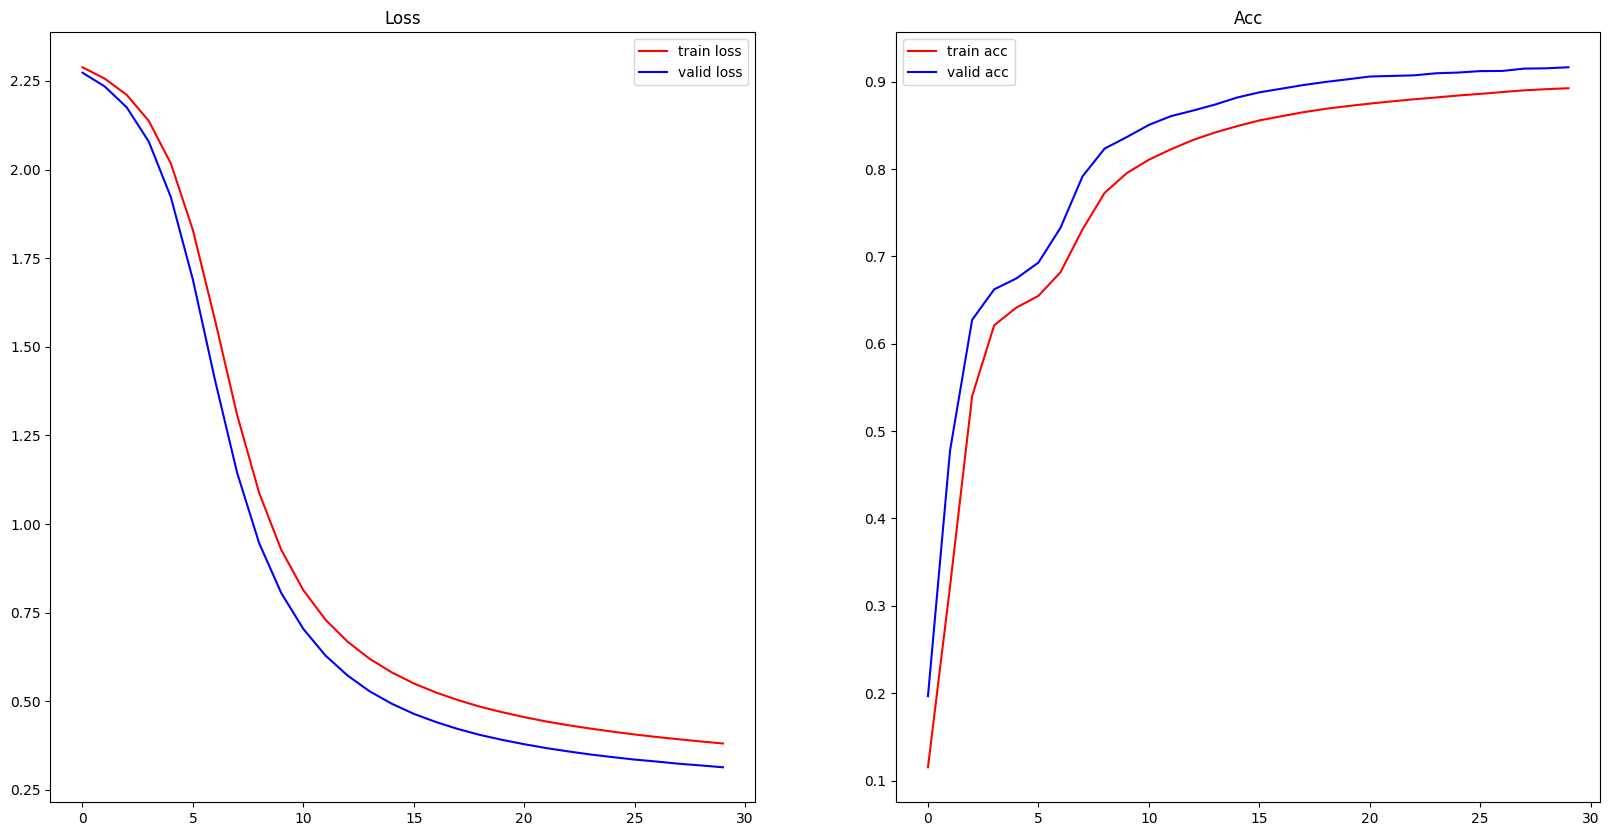

In [39]:
# Change the max_epochs.
trainer = Trainer(model_class=Classifier, 
                  loaders=loaders["mnist"], 
                  n_class=10, 
                  opt="sgd", 
                  lr=0.001, 
                  device=device).to(device)
trainer.train(max_epochs=30)
trainer.test()

Adjusting learning rate of group 0 to 1.0000e-03.
===== Train Start =====
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 0, train loss: 0.302424, train acc: 0.911977, valid loss: 0.126537, valid acc: 0.961358
Adjusting learning rate of group 0 to 1.0000e-03.
Adjusting learning rate of group 0 to 1.0000e-03.
Adjusting learning rate of group 0 to 1.0000e-03.
Adjusting learning rate of group 0 to 5.0000e-04.
Adjusting learning rate of group 0 to 5.0000e-04.
Epoch: 5, train loss: 0.019761, train acc: 0.994662, valid loss: 0.072473, valid acc: 0.982695
Adjusting learning rate of group 0 to 5.0000e-04.
Adjusting learning rate of group 0 to 5.0000e-04.
Adjusting learning rate of group 0 to 5.0000e-04.
Adjusting learning rate of group 0 to 2.5000e-04.
Adjusting learning rate of group 0 to 2.5000e-04.
Epoch: 10, train loss: 0.002926, train acc: 0.999537, valid loss: 0.079013, valid acc: 0.983871
Adjusting learning rate of group 0 to 2.5000e-04.
Adjusting learning rate of group 0 to 2.

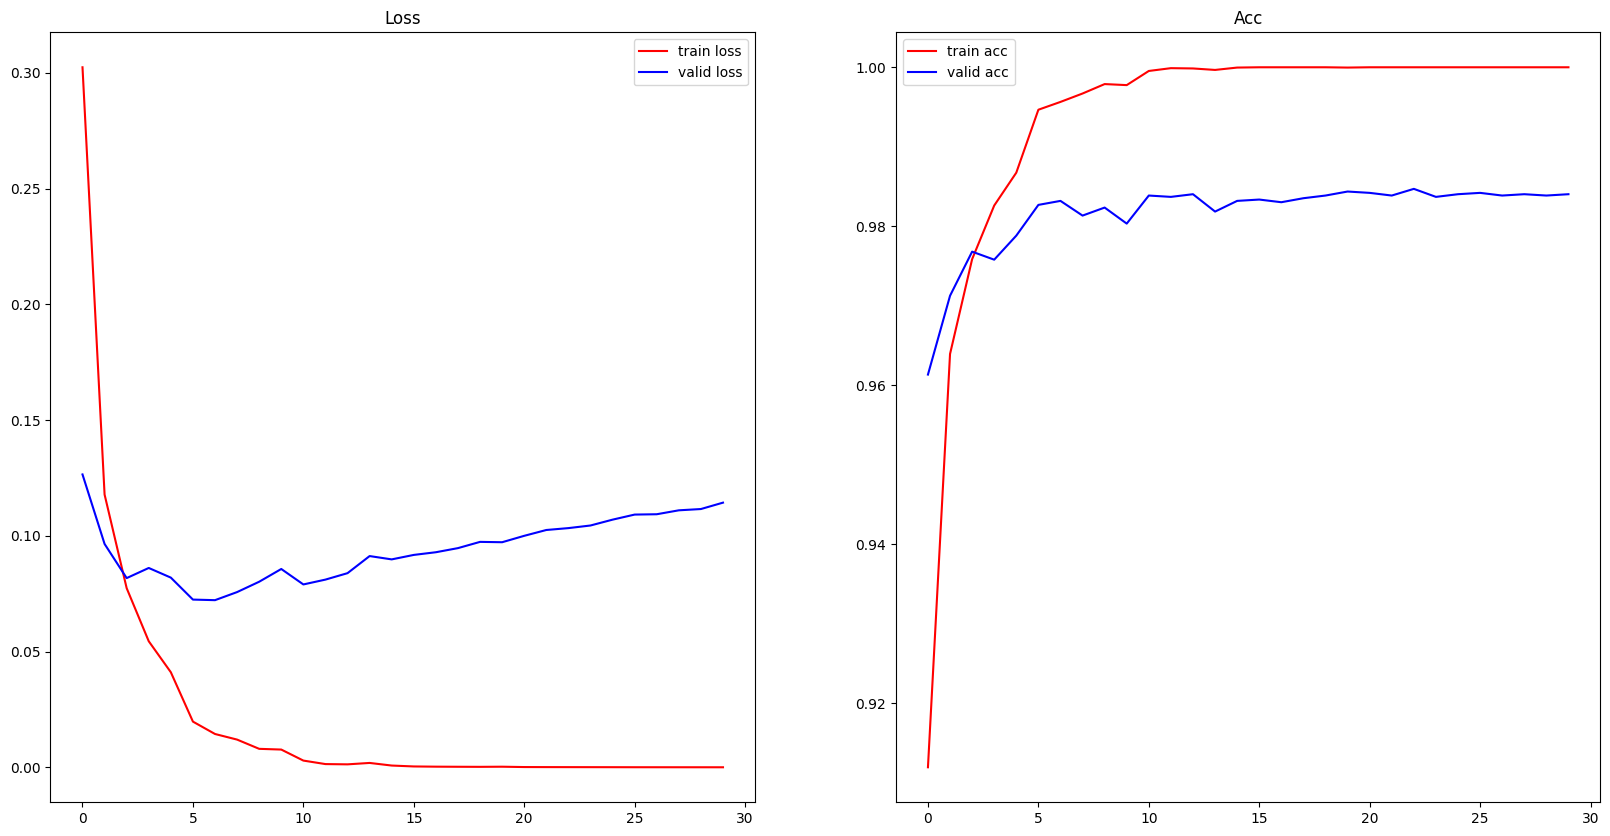

In [41]:
# Change the optimizer and turn on the scheduler.
trainer = Trainer(model_class=Classifier, 
                  loaders=loaders["mnist"], 
                  n_class=10, 
                  opt="adam", 
                  lr=0.001, 
                  has_scheduler=True,
                  device=device).to(device)
trainer.train(max_epochs=30)
trainer.test()

In [42]:
# And try the same hyperparameters with other datasets.

===== Train Start =====
Epoch: 0, train loss: 0.544534, train acc: 0.806995, valid loss: 0.454993, valid acc: 0.823925
Epoch: 5, train loss: 0.278252, train acc: 0.895370, valid loss: 0.345335, valid acc: 0.872312
Epoch: 10, train loss: 0.222623, train acc: 0.914609, valid loss: 0.321375, valid acc: 0.891465
Epoch: 15, train loss: 0.180791, train acc: 0.932662, valid loss: 0.344163, valid acc: 0.888609
Epoch: 20, train loss: 0.151867, train acc: 0.942523, valid loss: 0.371212, valid acc: 0.894825
Epoch: 25, train loss: 0.132207, train acc: 0.949010, valid loss: 0.392738, valid acc: 0.897849
===== Test Start =====
Test loss: 0.432688, Test acc: 0.891126


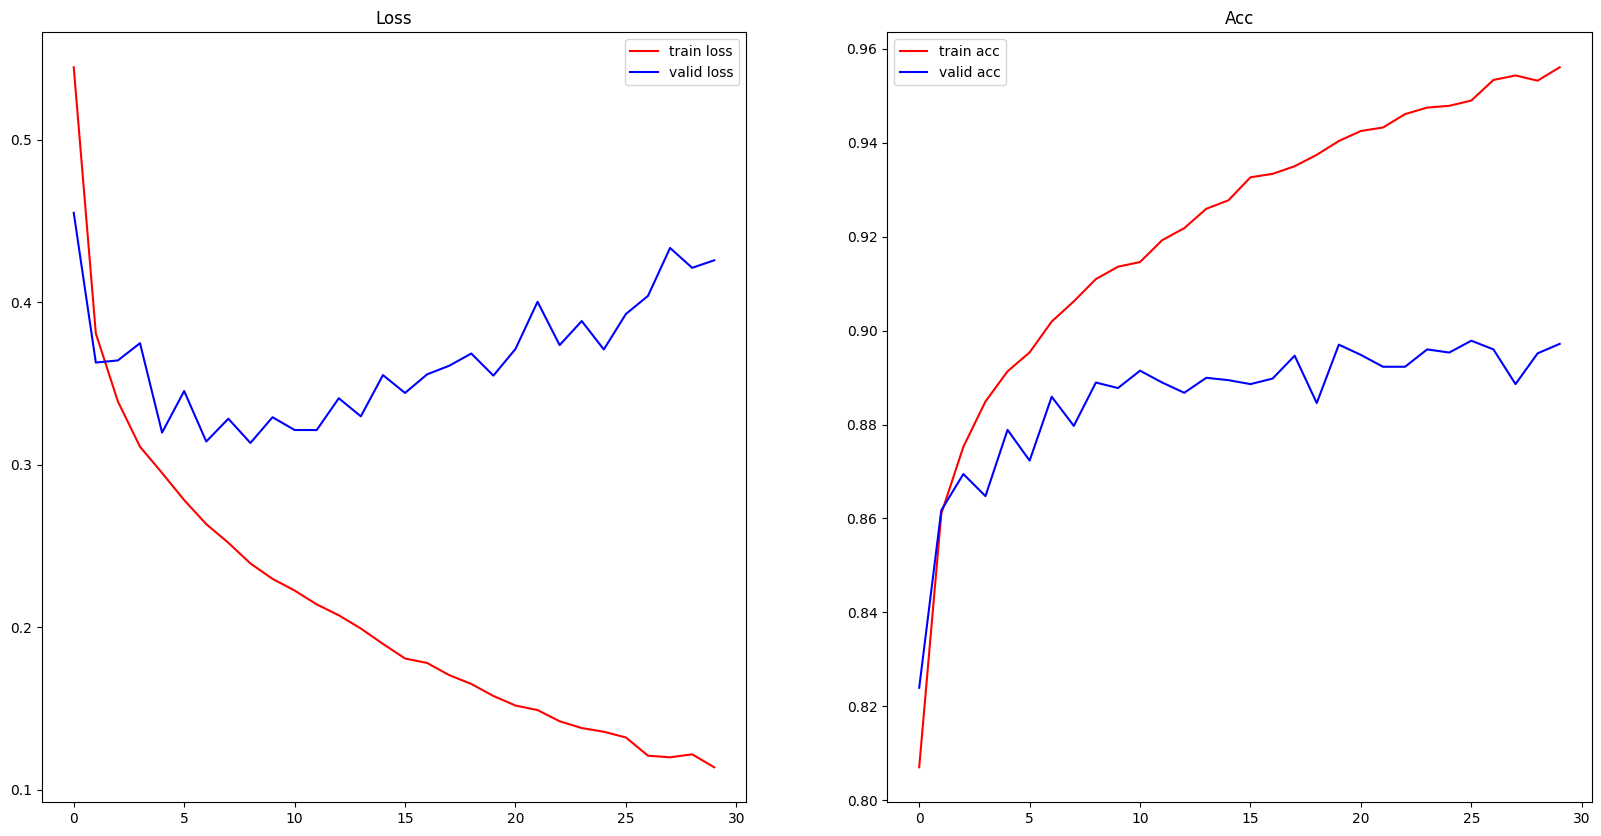

In [44]:
trainer = Trainer(model_class=Classifier, 
                  loaders=loaders["fmnist"], 
                  n_class=10, 
                  opt="adam", 
                  lr=0.001,
                  device=device).to(device)
trainer.train(max_epochs=30)
trainer.test()

===== Train Start =====
Epoch: 0, train loss: 0.442045, train acc: 0.865677, valid loss: 0.270547, valid acc: 0.919187
Epoch: 5, train loss: 0.041366, train acc: 0.987378, valid loss: 0.184921, valid acc: 0.955645
Epoch: 10, train loss: 0.016290, train acc: 0.994736, valid loss: 0.261484, valid acc: 0.956653
Epoch: 15, train loss: 0.012338, train acc: 0.995941, valid loss: 0.263074, valid acc: 0.957829
Epoch: 20, train loss: 0.009976, train acc: 0.996849, valid loss: 0.302560, valid acc: 0.957157
Epoch: 25, train loss: 0.006740, train acc: 0.997906, valid loss: 0.278192, valid acc: 0.962702
===== Test Start =====
Test loss: 0.889987, Test acc: 0.900140


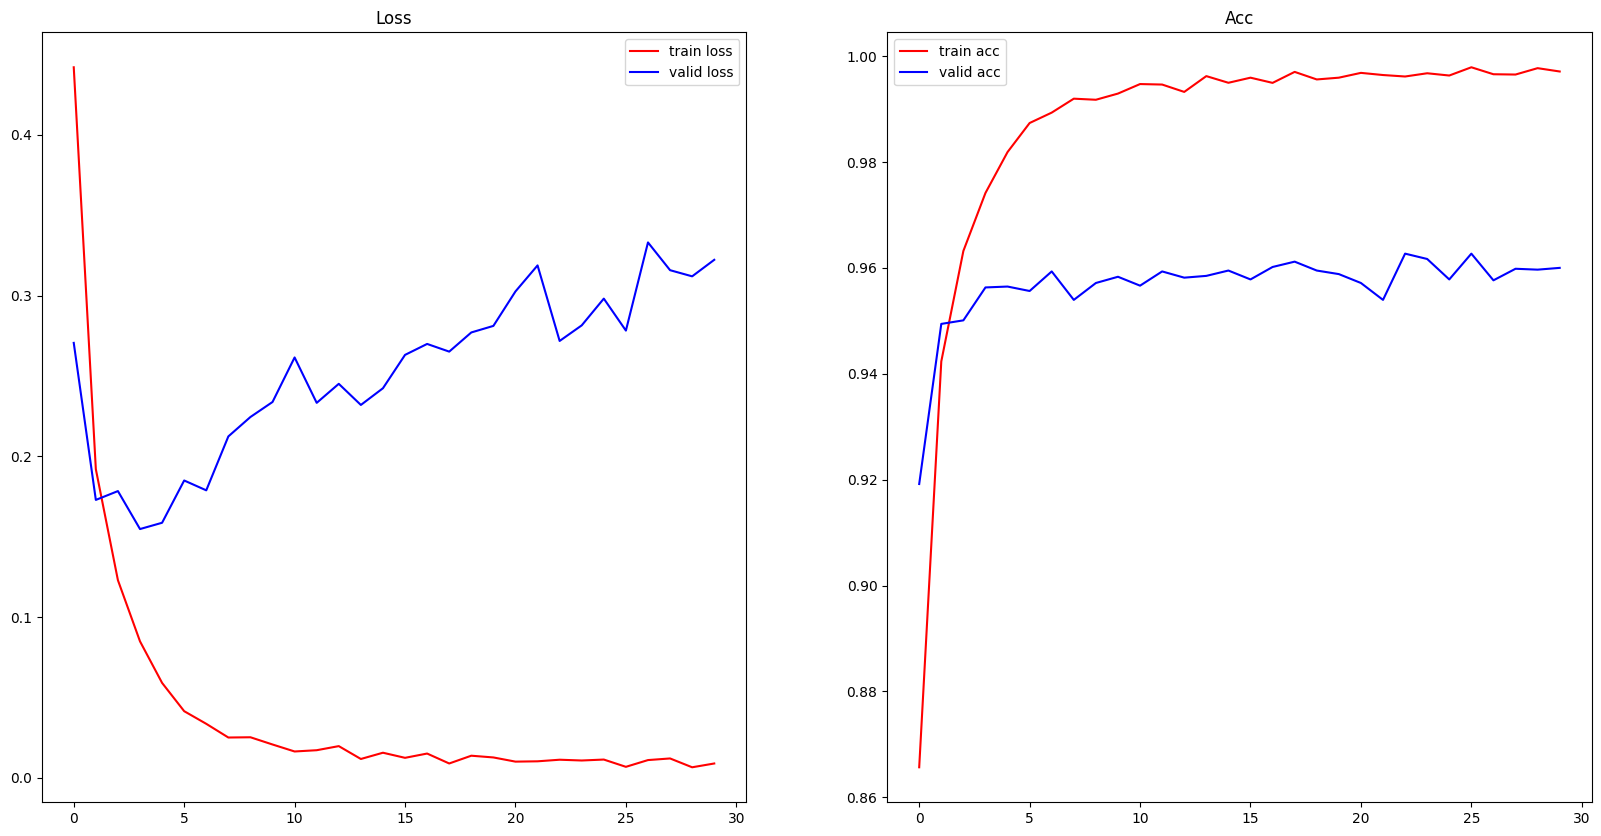

In [45]:
trainer = Trainer(model_class=Classifier, 
                  loaders=loaders["kmnist"], 
                  n_class=10, 
                  opt="adam", 
                  lr=0.001,
                  device=device).to(device)
trainer.train(max_epochs=30)
trainer.test()

===== Train Start =====
Epoch: 0, train loss: 0.879175, train acc: 0.743143, valid loss: 0.594154, valid acc: 0.806913
===== Test Start =====
Test loss: 0.443659, Test acc: 0.844266


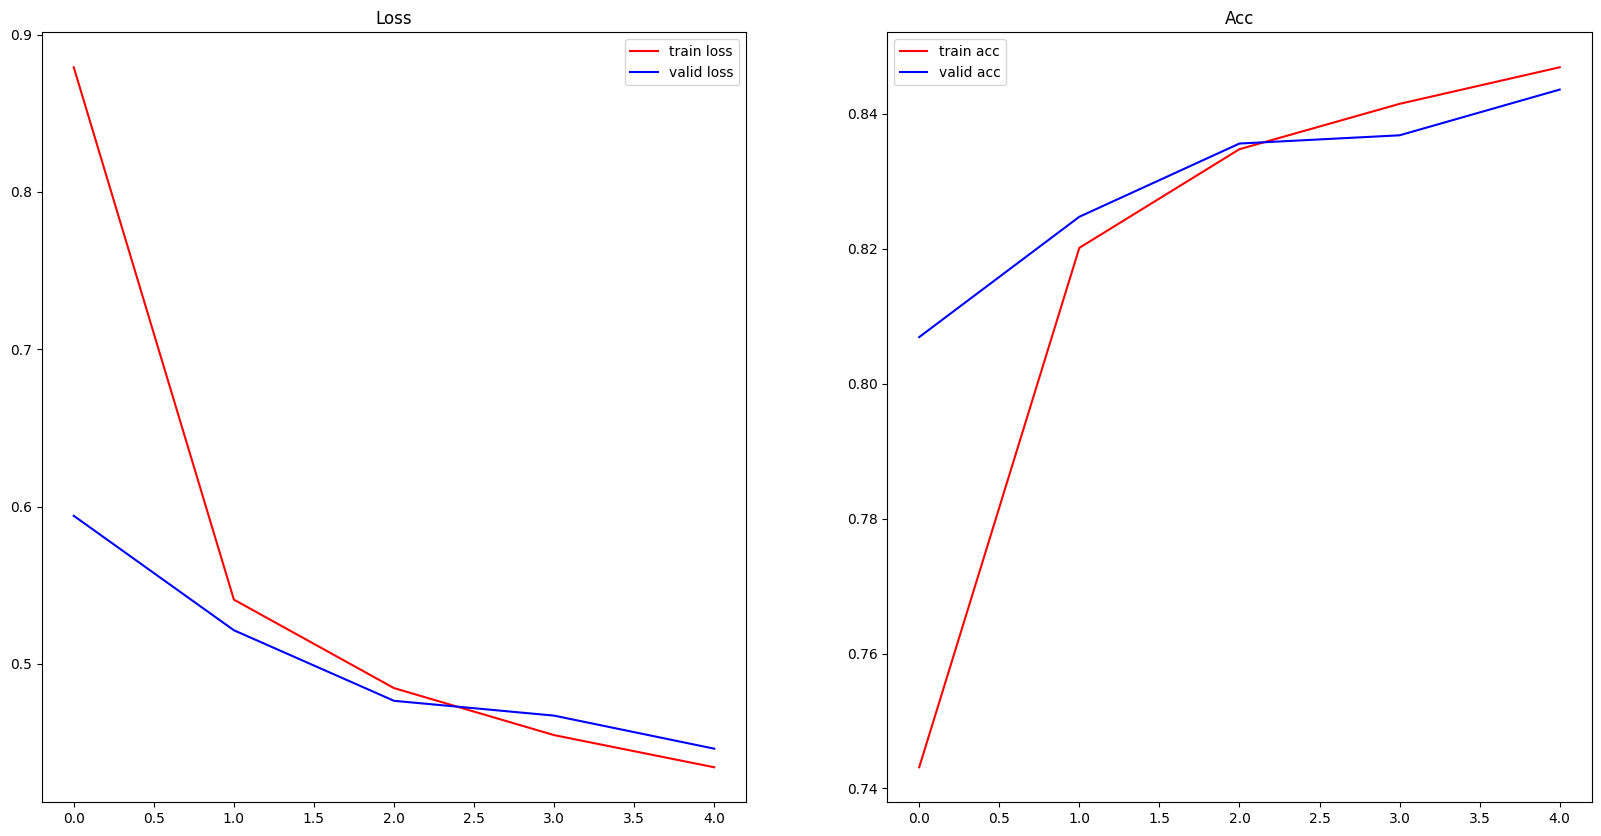

In [48]:
trainer = Trainer(model_class=Classifier, 
                  loaders=loaders["emnist"], 
                  n_class=62, 
                  opt="adam", 
                  lr=0.001,
                  device=device).to(device)
trainer.train(max_epochs=5)
trainer.test()

Start short training dataset mnist with adam optimizer
===== Train Start =====
Epoch: 0, train loss: 0.297737, train acc: 0.913479, valid loss: 0.116485, valid acc: 0.966230
Epoch: 5, train loss: 0.032393, train acc: 0.989973, valid loss: 0.077180, valid acc: 0.977655
Epoch: 10, train loss: 0.016070, train acc: 0.994384, valid loss: 0.080373, valid acc: 0.980847
===== Test Start =====
Test loss: 0.085857, Test acc: 0.980769
Start short training dataset fmnist with adam optimizer
===== Train Start =====
Epoch: 0, train loss: 0.530955, train acc: 0.811759, valid loss: 0.386295, valid acc: 0.856855
Epoch: 5, train loss: 0.277480, train acc: 0.897668, valid loss: 0.343058, valid acc: 0.882056
Epoch: 10, train loss: 0.222270, train acc: 0.915740, valid loss: 0.315932, valid acc: 0.890625
===== Test Start =====
Test loss: 0.354704, Test acc: 0.888121
Start short training dataset kmnist with adam optimizer
===== Train Start =====
Epoch: 0, train loss: 0.440878, train acc: 0.865640, valid loss

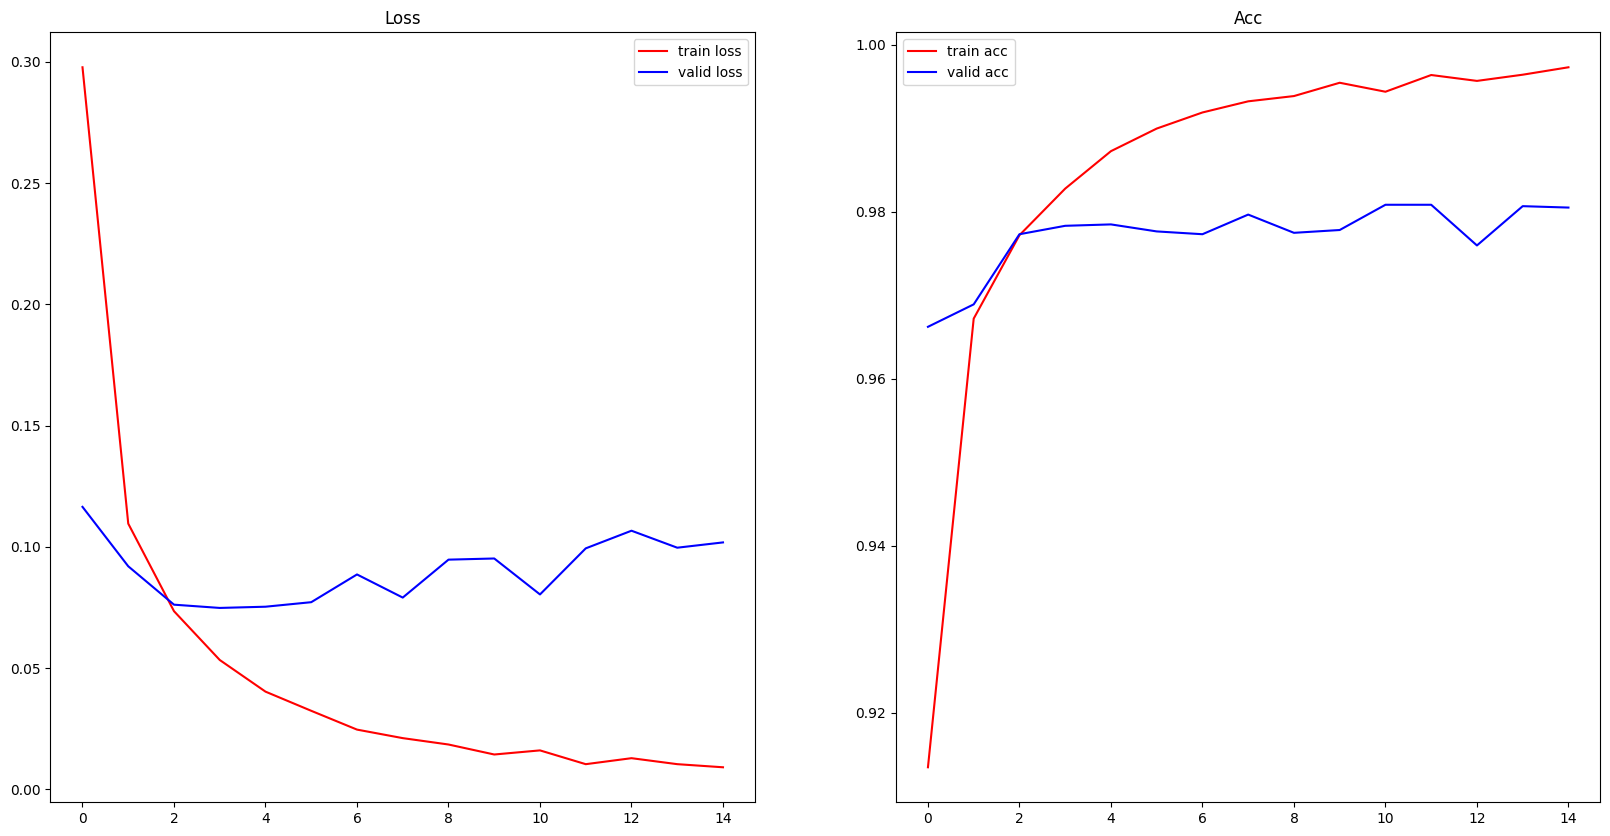

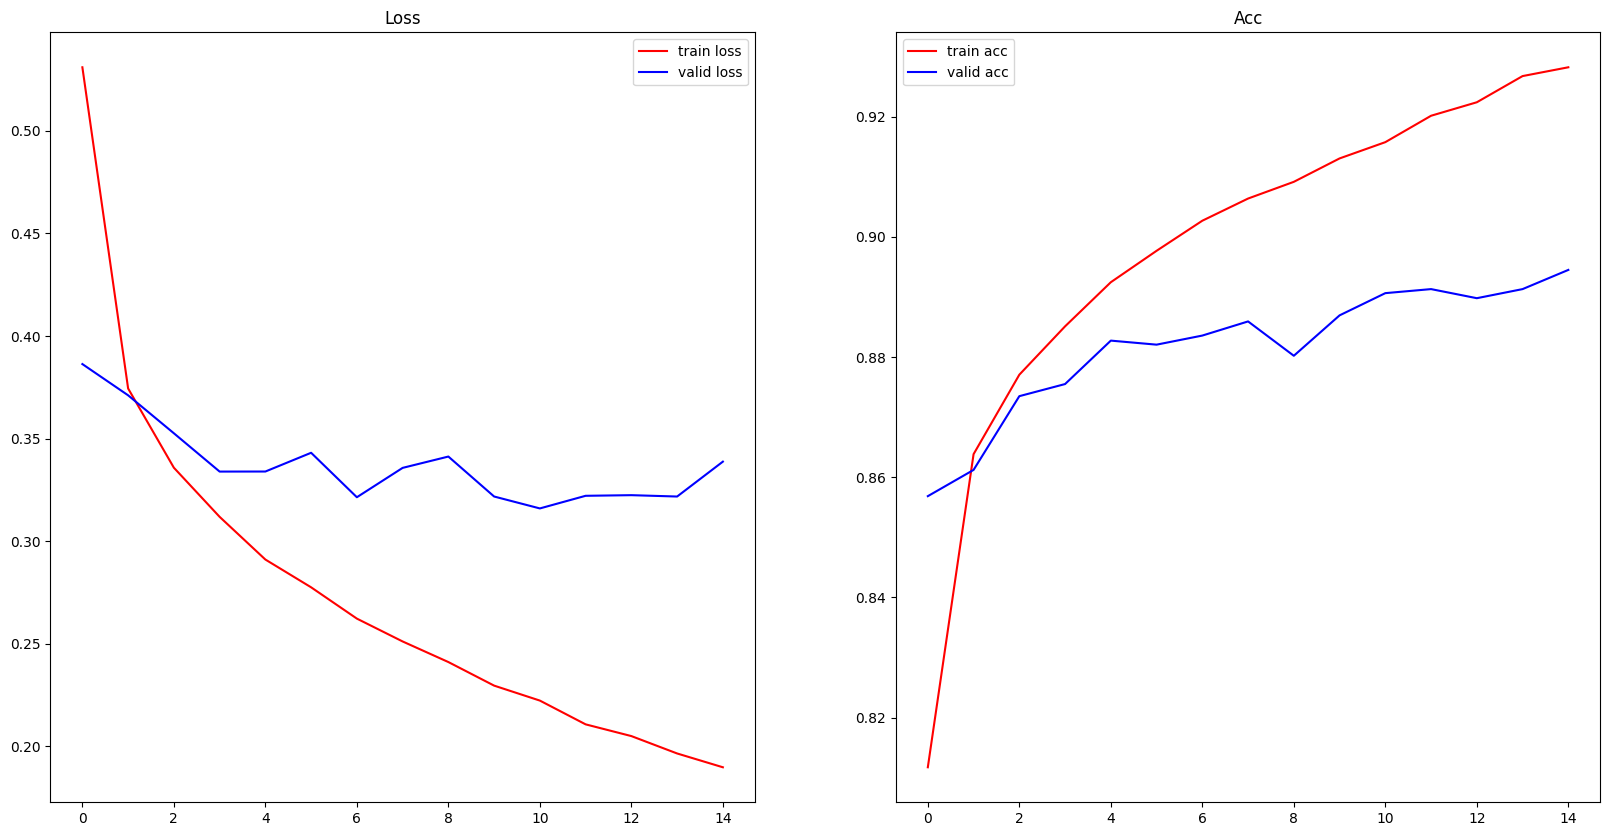

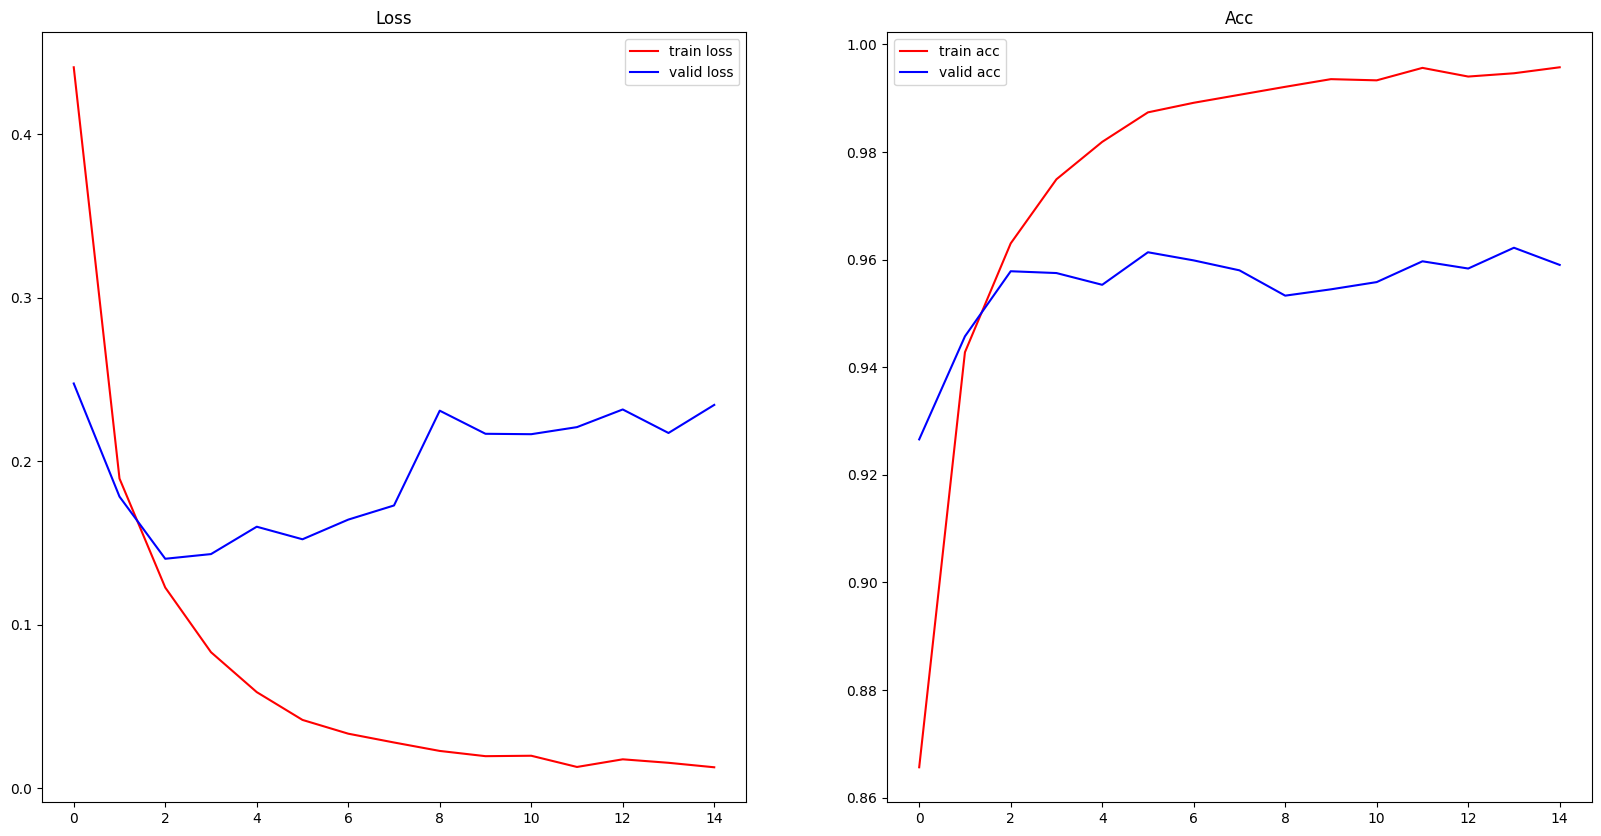

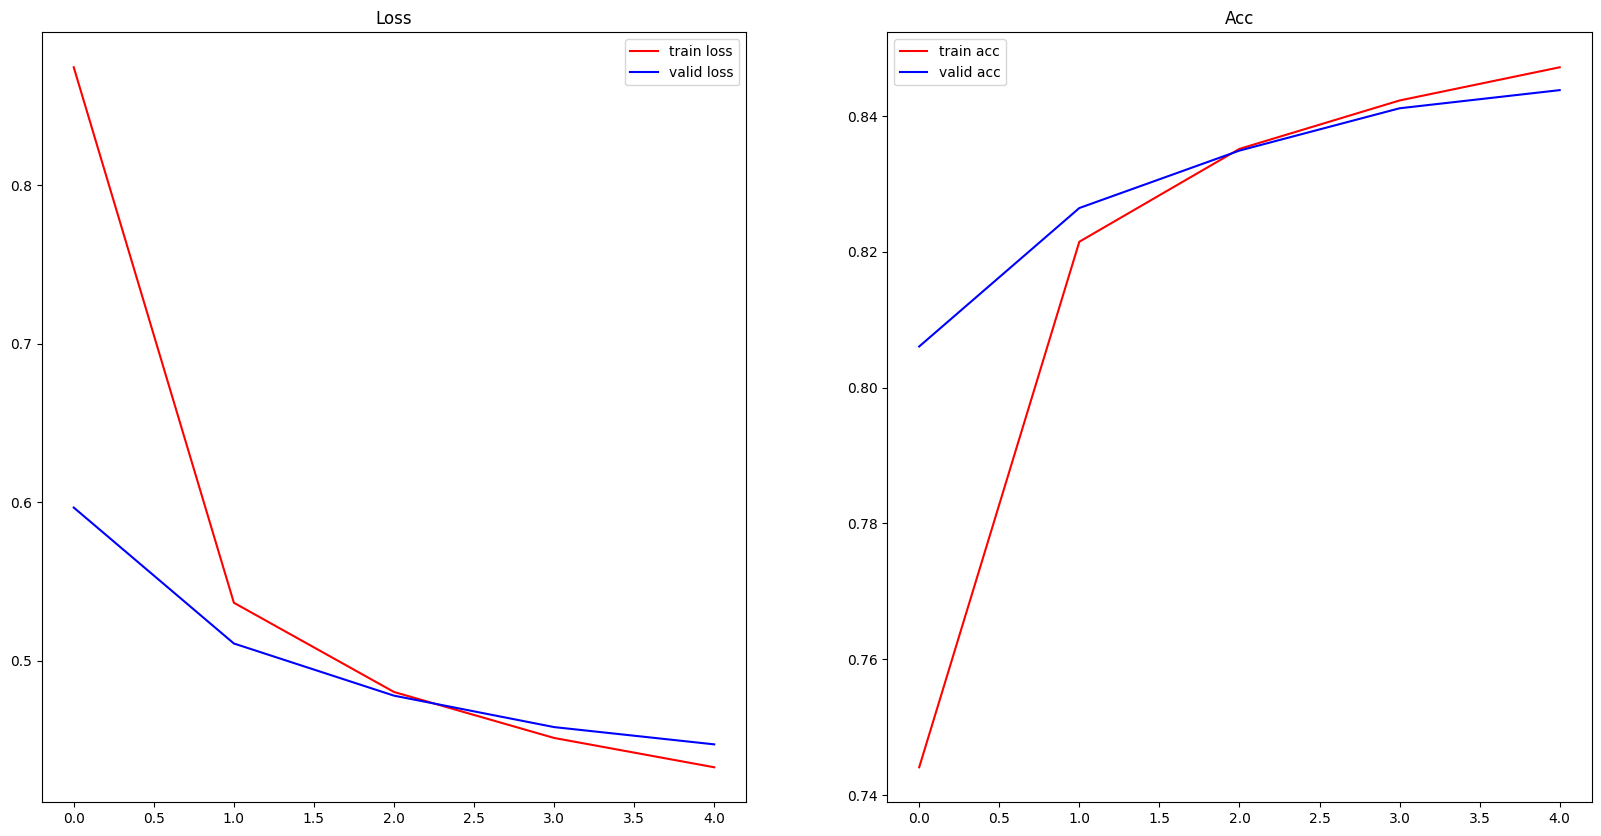

In [51]:
table = {"mnist": 10, "fmnist": 10, "kmnist": 10, "emnist": 62}
for d_name in ["mnist", "fmnist", "kmnist", "emnist"]:
    print(f"Start short training dataset {d_name} with adam optimizer")
    trainer = Trainer(model_class=Classifier, 
                      loaders=loaders[d_name], 
                      n_class=table[d_name], 
                      opt="adam", 
                      lr=0.001, 
                      device=device).to(device)
    trainer.train(max_epochs = 15 if d_name != "emnist" else 5)
    trainer.test()